**HOMEWORK 1- QUESTION 2 (INDIVIDUAL)** - SATYA SAI SREENIJA EARANKI <searanki@iu.edu>

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('abalone.csv')

In [392]:
import warnings
warnings.filterwarnings('ignore')

**A. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?**

We can determine the amount of data that is present in the dataset by performing the following steps. It is observed that the dataset comprises 4,177 rows and 9 columns. Out of which 'Sex' is a categorical attribute and the rest of the 8 columns are continuous valued attributes, i.e., Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings

In [393]:
df.shape

(4177, 9)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [395]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [396]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

**B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?**


In [397]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


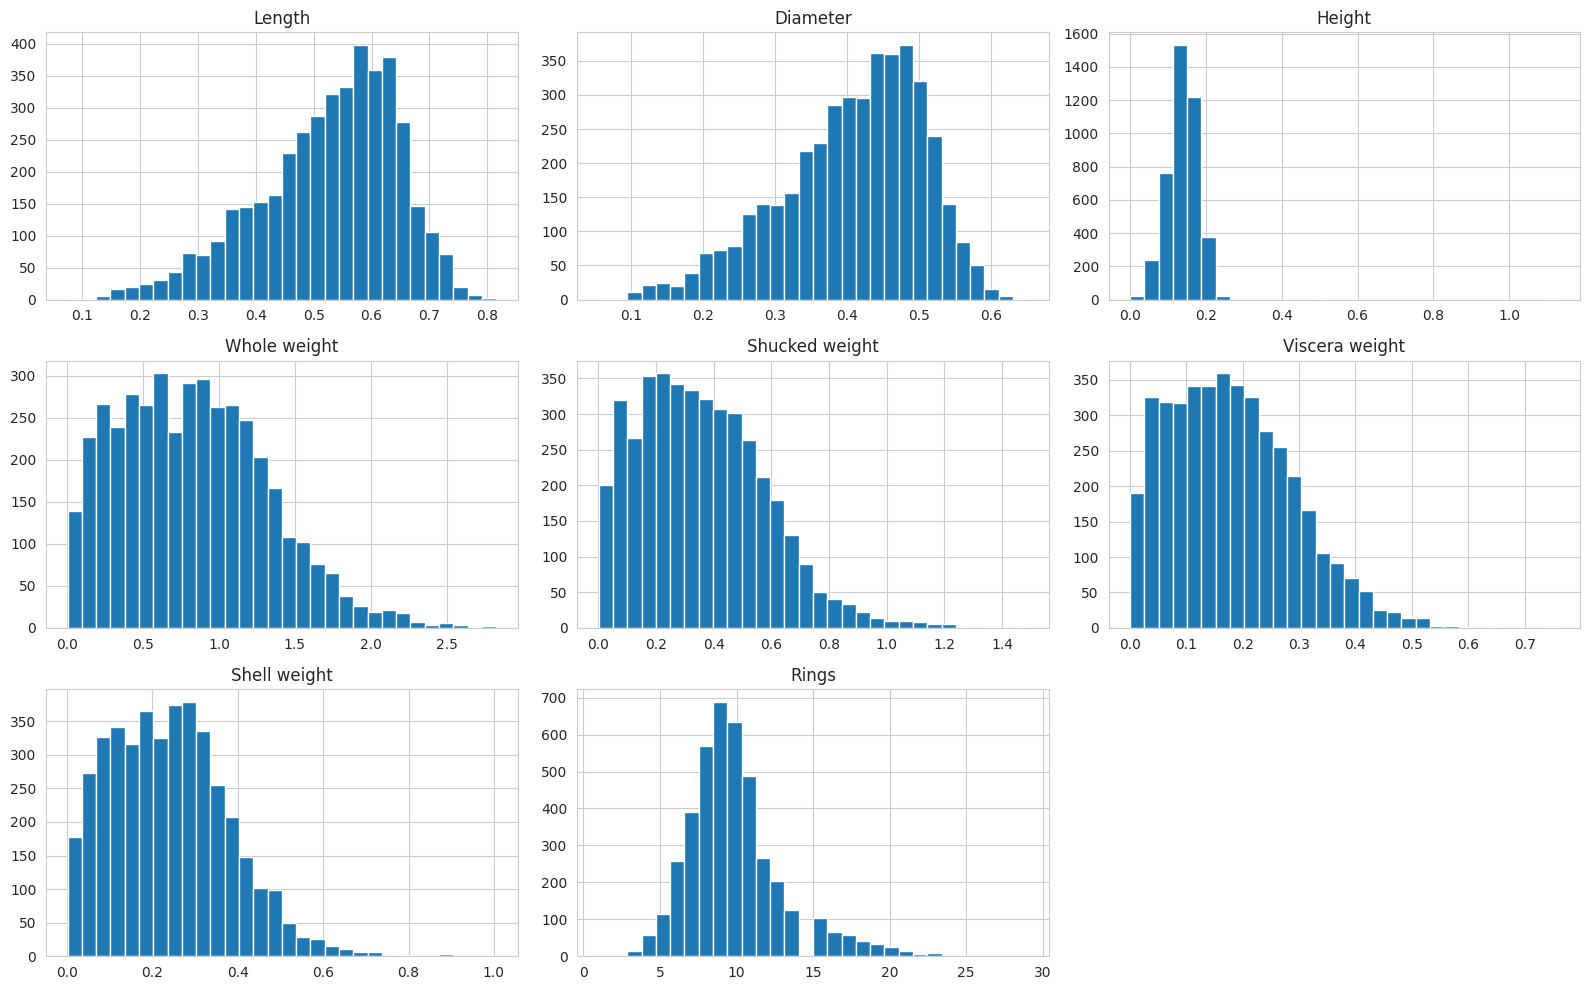

In [398]:
import matplotlib.pyplot as plt


# plot histograms for each attribute
df.hist(bins=30, figsize=(16,10))
plt.tight_layout()
plt.show()


From statistical analysis of the data:
Attributes such as length, diameter, height, and weight are continuous variables, quantifying the abalones' physical dimensions. These variables show a positive skew, indicating a concentration of data points at the lower spectrum with fewer high-value outliers. Additionally, there is a strong correlation among these variables, suggesting they typically increase or decrease in unison.

'Rings' is an ordinal discrete variable, reflecting the shell's ring count to approximate the abalone's age. This variable also exhibits a positive skew, with the majority of values falling between 5 and 15, and outliers reaching as high as 292. Furthermore, there is a correlation between the rings and the physical dimension attributes, indicating that older abalones are generally bigger and heavier.


***Special Treatment:***


we would have to perform one hot encoding on the 'Sex' variable since it is categorical

we also observe that there are a values in the Height attribute that have 0.0 values need to be imputed with the median.

In [399]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [400]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


**C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

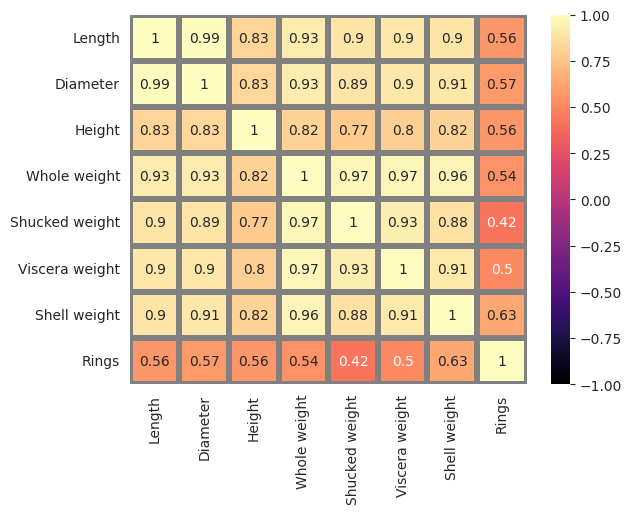

In [401]:
import seaborn as sns
sns.heatmap(df.corr(),  annot = True, vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='grey',cmap="magma")
plt.show()

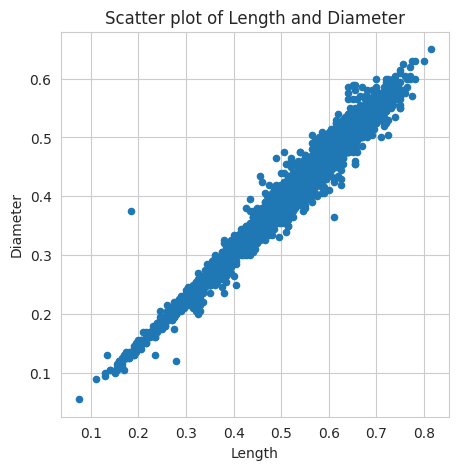

In [402]:
df.plot(kind="scatter", x="Length", y="Diameter", figsize=(5,5), title="Scatter plot of Length and Diameter")
plt.show()

From the correlation graph we observe that there is a strong positive correlation among Length, Diameter, and Height, as well as between these dimensions and the various weight measurements (Whole weight, Shucked weight, Viscera weight, Shell weight). This indicates that as the physical size of the abalone increases, its weight in different categories also tends to increase.

Shell weight shows the highest correlation with Rings (PCC = 0.63), suggesting that the weight of the shell is a good indicator of the abalone's age. Following this, Diameter and Height also show relatively strong correlations with Rings. This implies that the overall size and the weight of the shell are important factors in estimating the age of an abalone.

Shucked weight has a lower correlation with Rings compared to other weight measurements, indicating that the meat weight inside the abalone is not as strongly related to its age as the shell weight.



In [403]:
# Identify rows with '0.0' values and print them
rows_with_zero = df.apply(lambda row: (row == 0.0).any(), axis=1)
filtered_df = df[rows_with_zero]

print(filtered_df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Rings  
1257          0.0860        0.1150      8  
3996          0.0285        0.3505      6  


In [404]:
df[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [405]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['Sex']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Sex']))
df = pd.concat([df.drop('Sex', axis=1), encoded_df], axis=1)

print(df)


      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I

In [406]:
# Step 1: Calculate the median height excluding '0.0' values
median_height = df.loc[df['Height'] != 0.0, 'Height'].median()

# replacing with median
df.loc[df['Height'] == 0.0, 'Height'] = median_height

In [407]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1.0,0.0,0.0


In [408]:
df[df['Height']==0]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M


In [409]:
df[df.isnull().any(axis=1)].shape

(0, 11)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_F           4177 non-null   float64
 9   Sex_I           4177 non-null   float64
 10  Sex_M           4177 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 359.1 KB


Length               Axes(0.125,0.712609;0.168478x0.167391)
Diameter          Axes(0.327174,0.712609;0.168478x0.167391)
Height            Axes(0.529348,0.712609;0.168478x0.167391)
Whole weight      Axes(0.731522,0.712609;0.168478x0.167391)
Shucked weight       Axes(0.125,0.511739;0.168478x0.167391)
Viscera weight    Axes(0.327174,0.511739;0.168478x0.167391)
Shell weight      Axes(0.529348,0.511739;0.168478x0.167391)
Rings             Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

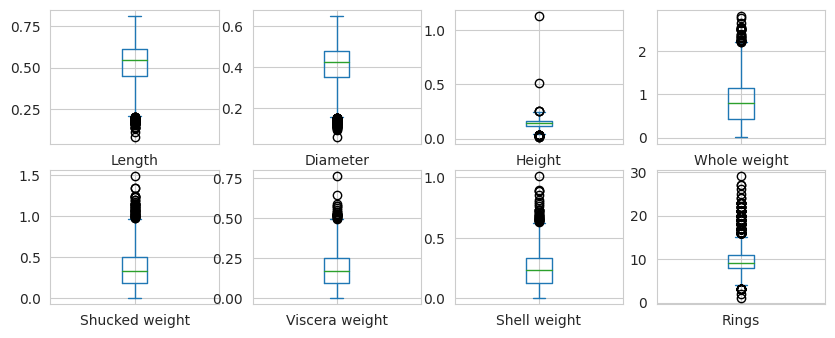

In [411]:
df[attributes[:]].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True)

In [412]:
corr=df.corr(method="pearson")
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827741,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833925,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827741,0.833925,1.000000,0.819618,0.775400,0.798647,0.819455,0.557497,0.298135,-0.517604,0.214815
Whole weight,0.925261,0.925452,0.819618,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.775400,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798647,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.819455,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557497,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
Sex_F,0.309666,0.318626,0.298135,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.517604,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


In [413]:
corr['Length'].sort_values(ascending=False)

Length            1.000000
Diameter          0.986812
Whole weight      0.925261
Viscera weight    0.903018
Shucked weight    0.897914
Shell weight      0.897706
Height            0.827741
Rings             0.556720
Sex_F             0.309666
Sex_M             0.236543
Sex_I            -0.551465
Name: Length, dtype: float64

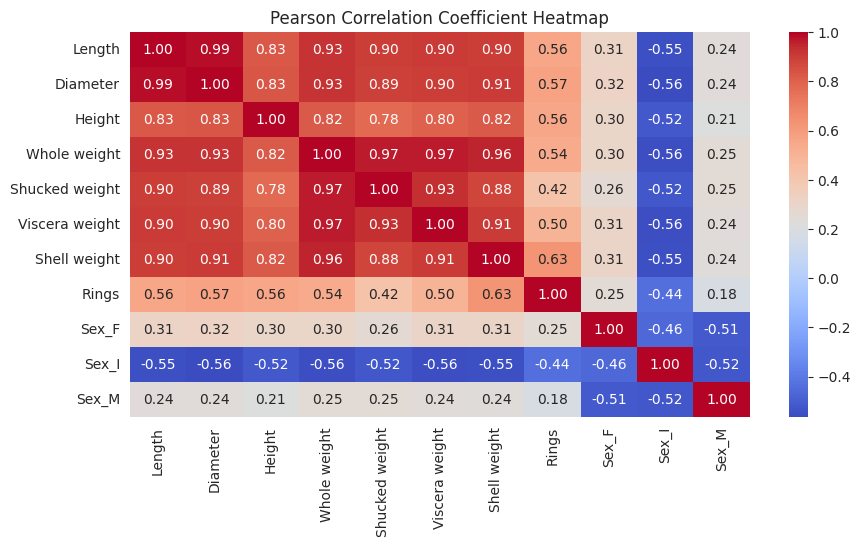

In [414]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

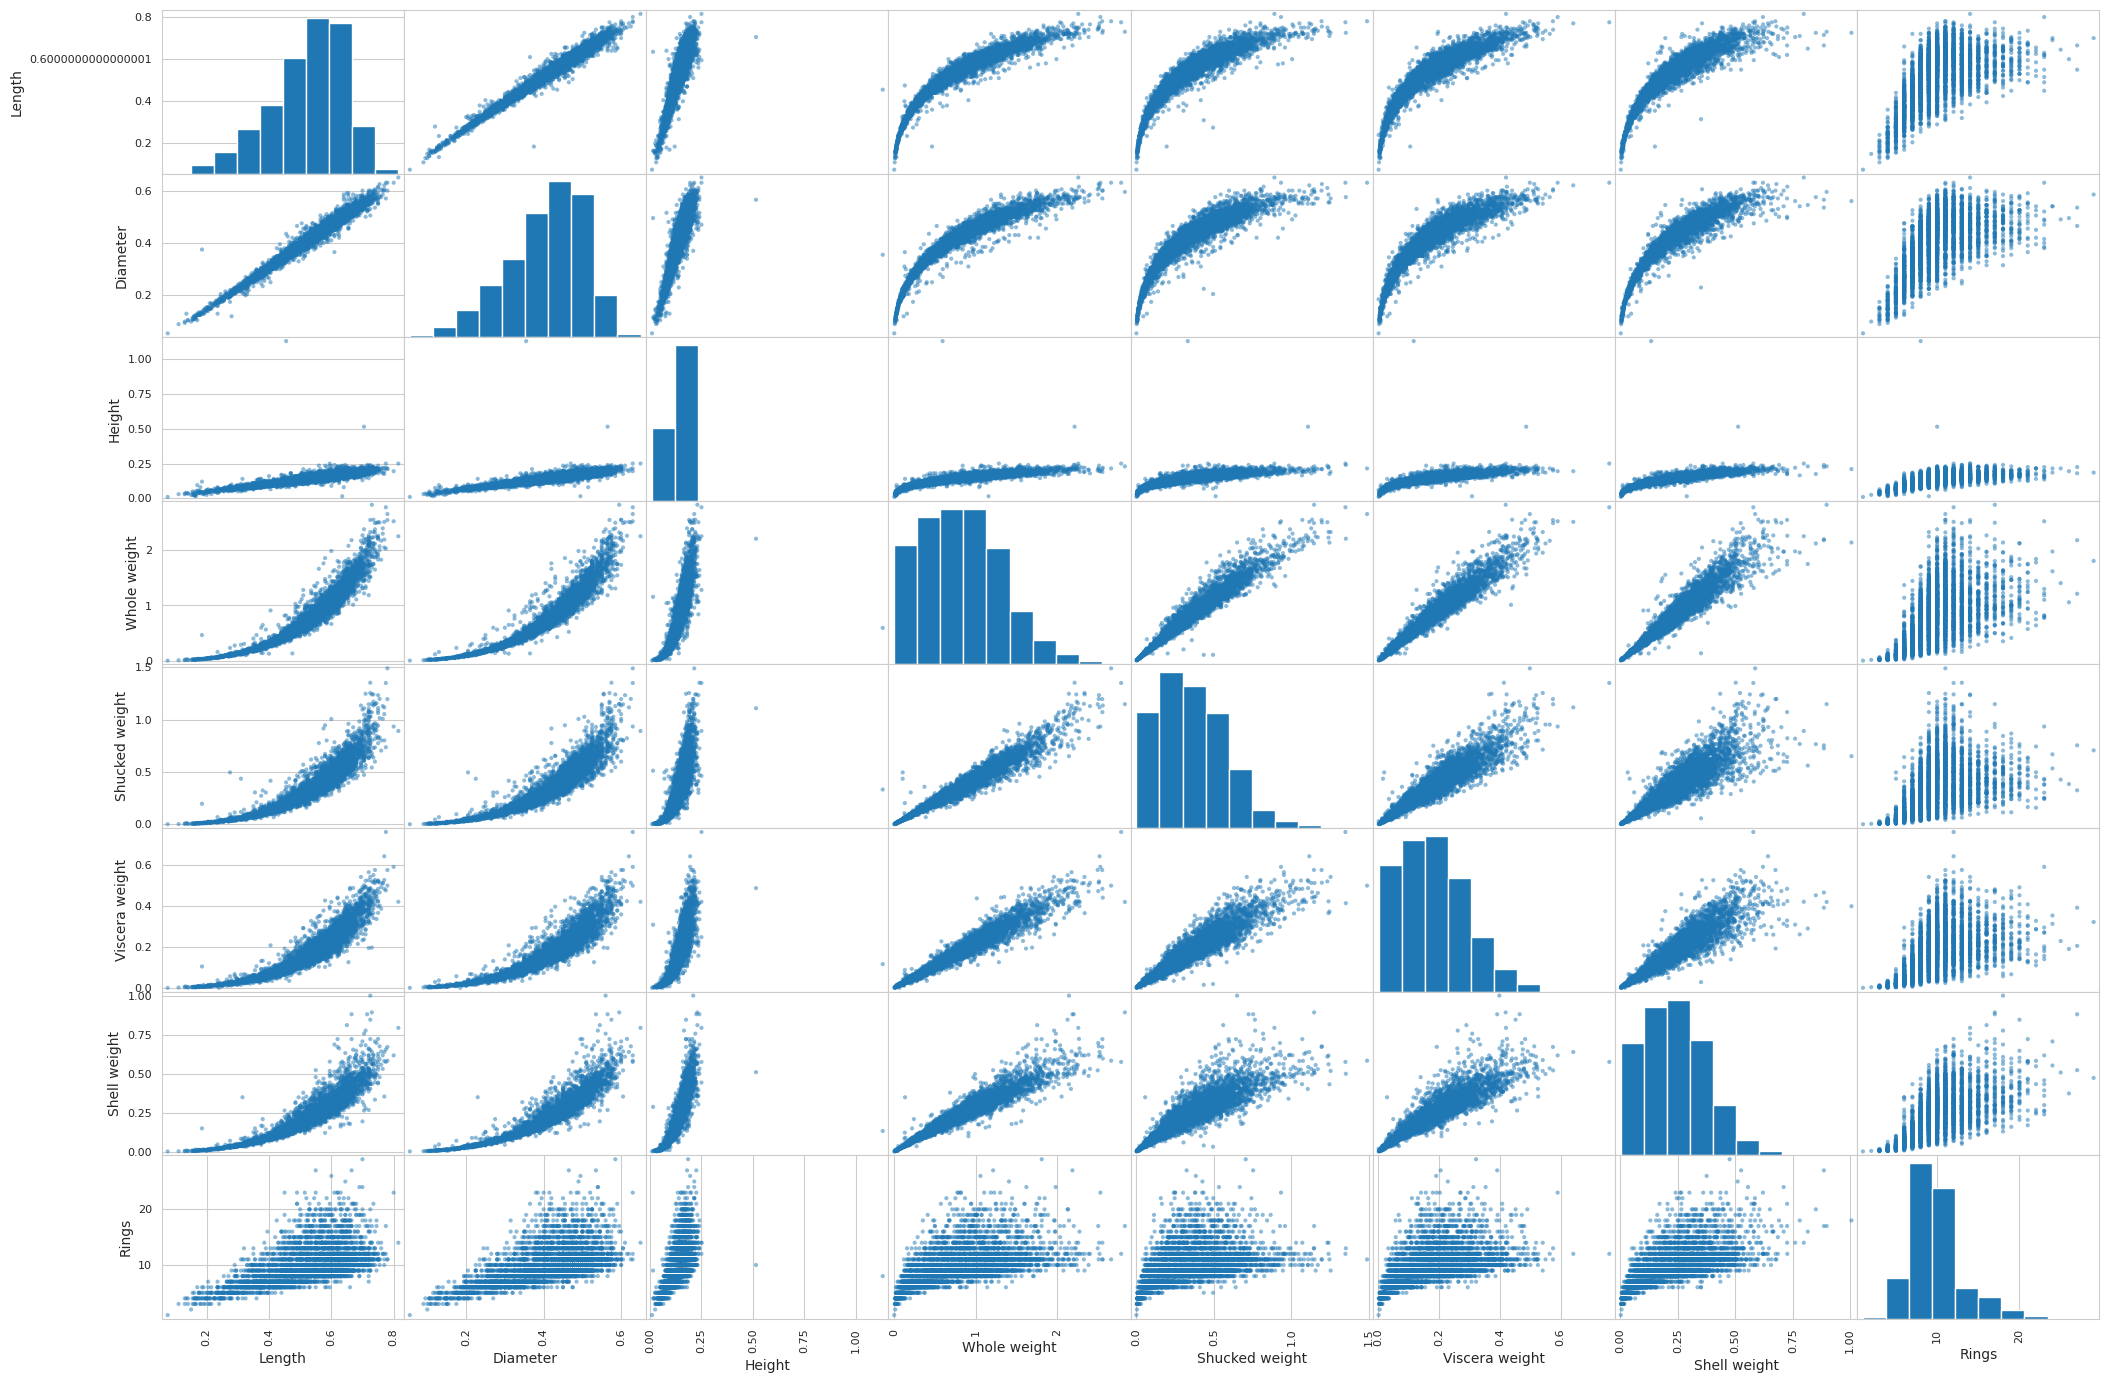

In [415]:
from pandas.plotting import scatter_matrix
attributes = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
scatter_matrix(df[attributes], figsize=(25, 17))
plt.show()

Scatter plot observations:

The scatter plots for Length, Diameter, Height, and the weight attributes against Rings display varying degrees of positive trends, indicating that larger and heavier abalones tend to have more rings (i.e., are older).
However, the scatter plots also reveal the presence of outliers, especially in the Height attribute, where some values are significantly higher or lower than the majority. This could affect the correlation and may need to be addressed in further analysis.

In [416]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1.0,0.0,0.0


In [417]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


In [418]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

**D. Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.**

In [419]:
features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
target = 'Rings'

X = df[features]
y = df[target]

In [420]:
X = df.drop('Rings', axis=1)  # Features (dropping the target to train the model)
y = df['Rings']  # Target variable

In [421]:
from sklearn.model_selection import train_test_split

# Split the dataset into training+validation (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+validation set into training (64% of original) and validation (16% of original)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [422]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
3099,0.575,0.480,0.150,0.9465,0.4355,0.2605,0.2505,0.0,0.0,1.0
2140,0.450,0.360,0.125,0.5065,0.2220,0.1050,0.1600,1.0,0.0,0.0
722,0.555,0.440,0.150,1.0920,0.4160,0.2120,0.4405,0.0,0.0,1.0
1049,0.715,0.565,0.175,1.9525,0.7645,0.4185,0.4135,0.0,0.0,1.0
1408,0.660,0.495,0.210,1.5480,0.7240,0.3525,0.3925,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2318,0.505,0.385,0.135,0.6185,0.2510,0.1175,0.2000,1.0,0.0,0.0
908,0.335,0.250,0.075,0.1825,0.0705,0.0440,0.0550,0.0,1.0,0.0
3256,0.575,0.480,0.150,0.8745,0.3750,0.1930,0.2900,1.0,0.0,0.0
1133,0.570,0.460,0.150,1.0375,0.5415,0.2035,0.2500,0.0,0.0,1.0


In [423]:
train_means = X_train.mean()
test_means = X_test.mean()

train_test_means_comparison = pd.DataFrame({'Train Means': train_means, 'Test Means': test_means})

train_test_means_comparison

,Train Means,Test Means
Length,0.525202,0.520108
Diameter,0.408748,0.405335
Height,0.139540,0.138421
Whole weight,0.830644,0.820365
Shucked weight,0.359967,0.354599
Viscera weight,0.180692,0.179640
Shell weight,0.239901,0.235431
Sex_F,0.306886,0.313397
Sex_I,0.327470,0.319378
Sex_M,0.365644,0.367225


The test portion of the dataset appears to be representative of the entire dataset, as shown by comparing the means of the training and test sets across all features. The means for both subsets are quite similar, indicating that the splitting process has maintained the distribution of the data effectively.


In [424]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


In [425]:
X_train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,0.525202,0.408748,0.139540,0.830644,0.359967,0.180692,0.239901,0.306886,0.327470,0.365644
std,0.118653,0.098265,0.038727,0.489329,0.220948,0.108474,0.139433,0.461288,0.469378,0.481700
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000
25%,0.453750,0.350000,0.115000,0.447000,0.188500,0.093500,0.130500,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.142500,0.802500,0.337500,0.171000,0.235000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.150125,0.499625,0.251500,0.329000,1.000000,1.000000,1.000000
max,0.815000,0.650000,0.515000,2.825500,1.351000,0.641500,1.005000,1.000000,1.000000,1.000000


In [426]:
X_train.shape

(2672, 10)

In [427]:
X_test.shape

(836, 10)

In [428]:
X_val.shape

(669, 10)

In [429]:
regression=linear_model.LinearRegression()

In [430]:
#standard scaling
initial_df=df.copy()
from sklearn.preprocessing import StandardScaler
for attribute in attributes[1:]:
    scale = StandardScaler().fit(df[[attribute]])
    df[[attribute]]=scale.transform(df[[attribute]])

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df["Rings"] = scaler.fit_transform(df[["Rings"]])

In [431]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
3099,0.575,0.480,0.150,0.9465,0.4355,0.2605,0.2505,0.0,0.0,1.0
2140,0.450,0.360,0.125,0.5065,0.2220,0.1050,0.1600,1.0,0.0,0.0
722,0.555,0.440,0.150,1.0920,0.4160,0.2120,0.4405,0.0,0.0,1.0
1049,0.715,0.565,0.175,1.9525,0.7645,0.4185,0.4135,0.0,0.0,1.0
1408,0.660,0.495,0.210,1.5480,0.7240,0.3525,0.3925,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2318,0.505,0.385,0.135,0.6185,0.2510,0.1175,0.2000,1.0,0.0,0.0
908,0.335,0.250,0.075,0.1825,0.0705,0.0440,0.0550,0.0,1.0,0.0
3256,0.575,0.480,0.150,0.8745,0.3750,0.1930,0.2900,1.0,0.0,0.0
1133,0.570,0.460,0.150,1.0375,0.5415,0.2035,0.2500,0.0,0.0,1.0


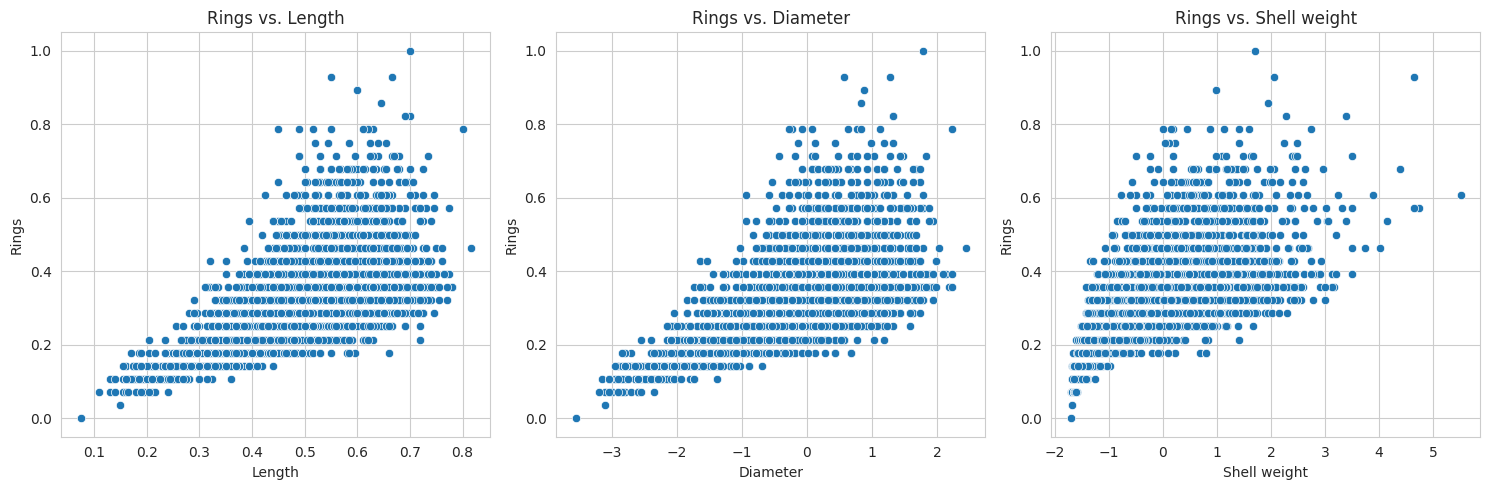

In [432]:
key_attributes = ['Length', 'Diameter', 'Shell weight']

plt.figure(figsize=(15, 5))

for index, attribute in enumerate(key_attributes, start=1):
    plt.subplot(1, 3, index)
    sns.scatterplot(data=df, x=attribute, y='Rings')
    plt.title(f'Rings vs. {attribute}')

plt.tight_layout()
plt.show()


In [433]:
print(X_train.describe())
print(X_test.describe())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  2672.000000  2672.000000  2672.000000   2672.000000     2672.000000   
mean      0.525202     0.408748     0.139540      0.830644        0.359967   
std       0.118653     0.098265     0.038727      0.489329        0.220948   
min       0.075000     0.055000     0.010000      0.002000        0.001000   
25%       0.453750     0.350000     0.115000      0.447000        0.188500   
50%       0.545000     0.425000     0.142500      0.802500        0.337500   
75%       0.615000     0.480000     0.165000      1.150125        0.499625   
max       0.815000     0.650000     0.515000      2.825500        1.351000   

       Viscera weight  Shell weight        Sex_F        Sex_I        Sex_M  
count     2672.000000   2672.000000  2672.000000  2672.000000  2672.000000  
mean         0.180692      0.239901     0.306886     0.327470     0.365644  
std          0.108474      0.139433     0.461288     0.469378     

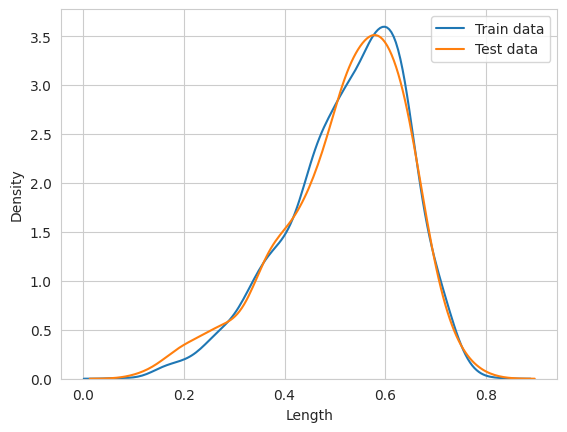

In [434]:
# visualization
import seaborn as sns
ax = sns.kdeplot(X_train['Length'],label='Train data')
sns.kdeplot(X_test['Length'], ax=ax,label='Test data')
plt.legend()

As we can see from the above graph visualization the test data is nearly representative of the entire dataset as the features plots and general stastistical values of the features are reflective of each other.

**E. Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.**

Linear Regression with 4-fold Cross-Validation: The linear regression model was evaluated using four-fold cross-validation, which provides a good estimate of its performance by partitioning the data into four parts, training on three, and testing on the fourth, then rotating this process. We also observe that the Mean Square Error is lowest for this method.

Stochastic Gradient Descent (SGD) Regression: The SGD Regressor's performance, when trained without regularization and with a default learning rate, resulted in an MSE close to that of the Linear Regression model.

Ridge: The performance varied slightly with different values of the alpha parameter, which controls the strength of regularization. Lower values of alpha (0.01, 0.1) had minimal impact on the MSE, suggesting that a mild regularization is nearly as effective as no regularization. Increasing the alpha value to 10 increased the MSE, indicating that too much regularization might degrade the model's performance.

Lasso Regression showed a more effect of the alpha parameter on the MSE. With alpha set to 0.01, the performance was slightly worse than Linear Regression. Increasing alpha to 0.1, 1, and 10 significantly increased the MSE, suggesting that Lasso's feature selection capability (which can set coefficients to zero) may be too aggressive for this dataset, potentially eliminating useful features.

Elastic Net, which combines L1 and L2 regularization, showed a performance trend similar to Lasso, with increasing alpha leading to higher MSEs. This indicates that the balance of feature selection and regularization needs to be carefully managed to avoid overly penalizing the model.


In [435]:
from sklearn.model_selection import KFold
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [436]:
#mean square error using normal equation
from sklearn.model_selection import KFold
from numpy.linalg import inv
import numpy as np

def cross_validate_linear_regression_normal_eq(model, X, y, n_splits=4):
    kf = KFold(n_splits=n_splits)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

        theta = inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

        y_pred = X_test_b.dot(theta)

        score = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
        scores.append(score)
    return np.array(scores)

model= 'normal_eqn'
s= cross_validate_linear_regression_normal_eq(model, X_train, y_train, 4)
scores_median = np.median(s)
scores_mean = np.mean(s)
scores_std = np.std(s)

print("Scores Median:", scores_median)
print("Scores Mean:", scores_mean)
print("Scores Standard Deviation:", scores_std)


Scores Median: -133.87472016181522
Scores Mean: -196.04723242194484
Scores Standard Deviation: 188.6565725617497


In [437]:
#using stochastic gradient descent for four-fold cross validation

from sklearn.model_selection import KFold
import numpy as np

def cross_validate_sgd(model, X, y, n_splits=4):
    kf = KFold(n_splits=n_splits)
    scores = []
    for train_index, test_index in kf.split(X):
        if isinstance(X, np.ndarray):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
        else:
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)
    return np.array(scores)


In [438]:
# SGD with cross-validation
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
scores = cross_validate_sgd(sgd, X_train, y_train)
print("SGD Scores:", scores)
print("SGD Mean:", np.mean(scores))
print("SGD Std:", np.std(scores))

SGD Scores: [0.50165409 0.48414284 0.48325872 0.52642047]
SGD Mean: 0.49886902846942677
SGD Std: 0.01751699709362121


In [439]:
df['Rings'] = np.log1p(df['Rings'])
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,-0.432149,-1.068880,-0.641898,-0.607685,-0.726212,-0.638217,0.405465,0.0,0.0,1.0
1,0.350,-1.439929,-1.188754,-1.230277,-1.170910,-1.205221,-1.212987,0.194156,0.0,0.0,1.0
2,0.530,0.122130,-0.109887,-0.309469,-0.463500,-0.356690,-0.207139,0.251314,1.0,0.0,0.0
3,0.440,-0.432149,-0.349635,-0.637819,-0.648238,-0.607600,-0.602294,0.278713,0.0,0.0,1.0
4,0.330,-1.540707,-1.428502,-1.272086,-1.215968,-1.287337,-1.320757,0.194156,0.0,1.0,0.0


In [440]:
#defining a linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Perform four-fold cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)
mse_train = [] # list to store the training MSE for each fold
mse_val = [] # list to store the validation MSE for each fold
for train_index, val_index in kf.split(X_train):

    # Fit the model on the training set
    X_train_kf=X_train
    y_train_kf=y_train
    X_val_kf=X_val
    y_val_kf=y_val

    model.fit(X_train_kf, y_train_kf)

    # Predict on the training and validation sets
    y_train_pred = model.predict(X_train_kf)
    y_val_pred = model.predict(X_val_kf)

    # Calculate the MSE on the training and validation sets
    from sklearn.metrics import mean_squared_error

    mse_train_kf = mean_squared_error(y_train_kf, y_train_pred)

    mse_val_kf = mean_squared_error(y_val_kf, y_val_pred)

    # Append the MSE to the lists
    mse_train.append(mse_train_kf)
    mse_val.append(mse_val_kf)

print(mse_train)
print(mse_val)

# Print the average MSE across the four folds
print("Average training MSE:", np.mean(mse_train))
print("Average validation MSE:", np.mean(mse_val))



[4.7346910398385615, 4.7346910398385615, 4.7346910398385615, 4.7346910398385615]
[5.555990212735339, 5.555990212735339, 5.555990212735339, 5.555990212735339]
Average training MSE: 4.7346910398385615
Average validation MSE: 5.555990212735339


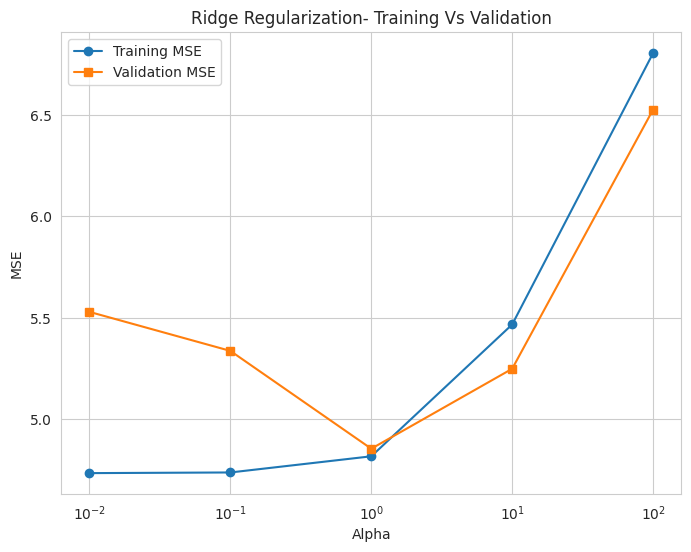

In [441]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

alphas = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=4, shuffle=True, random_state=42)

ridge_train = []
ridge_val = []

for alpha in alphas:

    model = Ridge(alpha=alpha)

    train = []
    val = []
    for train_index, val_index in kf.split(X_train):

        model.fit(X_train_kf, y_train_kf)

        y_train_pred = model.predict(X_train_kf)
        y_val_pred = model.predict(X_val_kf)

        train.append(mean_squared_error(y_train_kf, y_train_pred))
        val.append(mean_squared_error(y_val_kf, y_val_pred))

    ridge_train.append(np.mean(train))
    ridge_val.append(np.mean(val))

# Plot the MSE as a function of alpha for Ridge
plt.figure(figsize=(8, 6))
plt.plot(alphas, ridge_train, label="Training MSE", marker='o')
plt.plot(alphas, ridge_val, label="Validation MSE", marker='s')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.title("Ridge Regularization- Training Vs Validation")
plt.show()


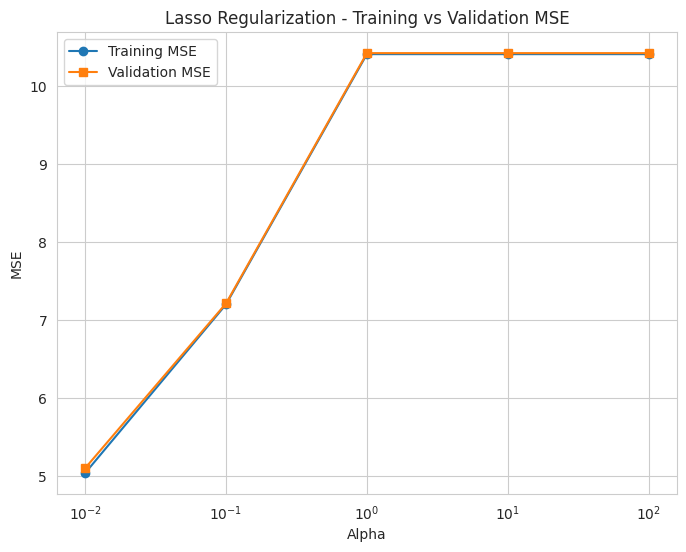

In [442]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

alphas = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=4, shuffle=True, random_state=42)

lasso_train = []
lasso_val = []

for alpha in alphas:

    model = Lasso(alpha=alpha)

    train = []
    val = []
    for train_index, val_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_kf, y_train_kf)

        y_train_pred = model.predict(X_train_kf)
        y_val_pred = model.predict(X_val_kf)

        train.append(mean_squared_error(y_train_kf, y_train_pred))
        val.append(mean_squared_error(y_val_kf, y_val_pred))

    lasso_train.append(np.mean(train))
    lasso_val.append(np.mean(val))

# Plot the MSE as a function of alpha for Lasso
plt.figure(figsize=(8, 6))
plt.plot(alphas, lasso_train, label="Training MSE", marker='o')
plt.plot(alphas, lasso_val, label="Validation MSE", marker='s')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.title("Lasso Regularization - Training vs Validation MSE")
plt.show()


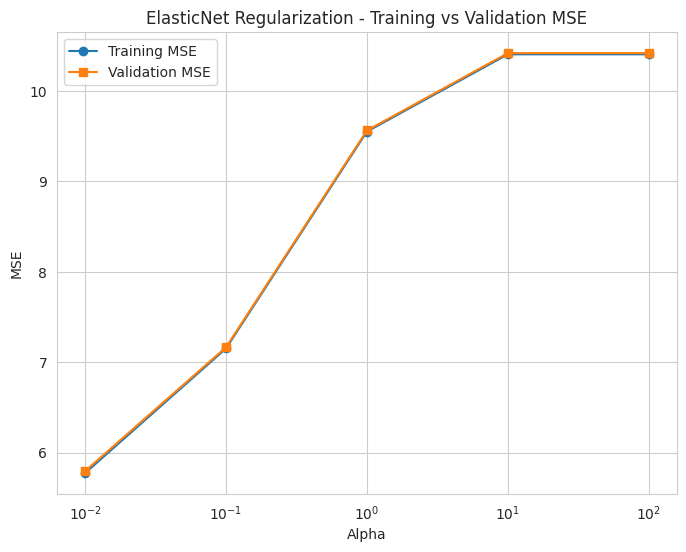

In [443]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

alphas = [0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=4, shuffle=True, random_state=42)

elasticnet_train = []
elasticnet_val = []

for alpha in alphas:
    model = ElasticNet(alpha=alpha)

    train = []
    val = []
    for train_index, val_index in kf.split(X_train):
        X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_kf, y_train_kf)

        y_train_pred = model.predict(X_train_kf)
        y_val_pred = model.predict(X_val_kf)

        train.append(mean_squared_error(y_train_kf, y_train_pred))
        val.append(mean_squared_error(y_val_kf, y_val_pred))

    elasticnet_train.append(np.mean(train))
    elasticnet_val.append(np.mean(val))

# Plot the MSE as a function of alpha for ElasticNet
plt.figure(figsize=(8, 6))
plt.plot(alphas, elasticnet_train, label="Training MSE", marker='o')
plt.plot(alphas, elasticnet_val, label="Validation MSE", marker='s')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.title("ElasticNet Regularization - Training vs Validation MSE")
plt.show()


Batch size: 1


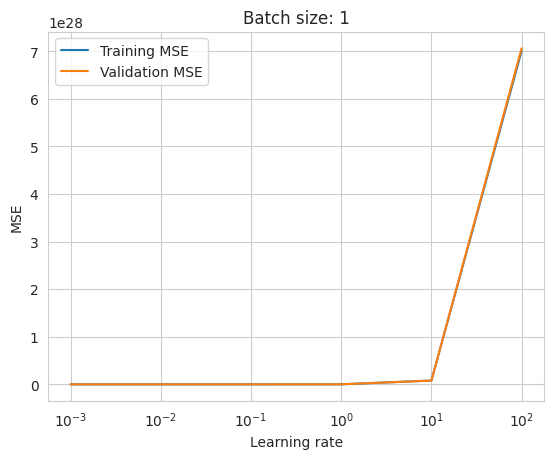

Batch size: 10


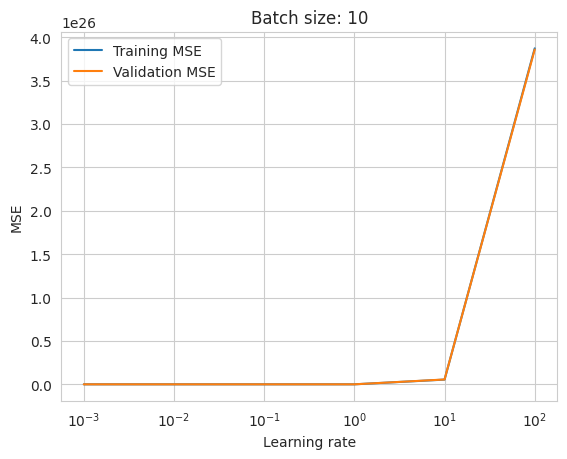

Batch size: 100


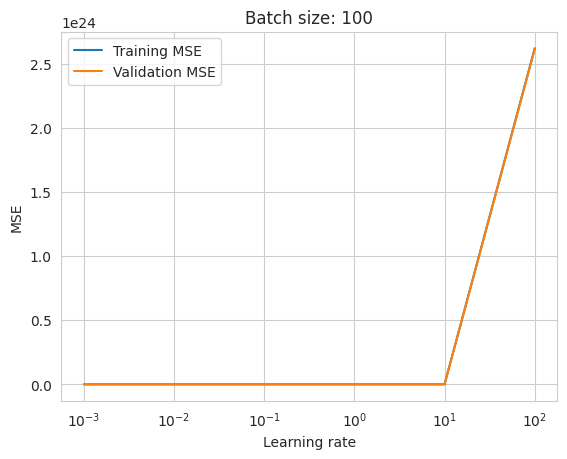

Batch size: 1000


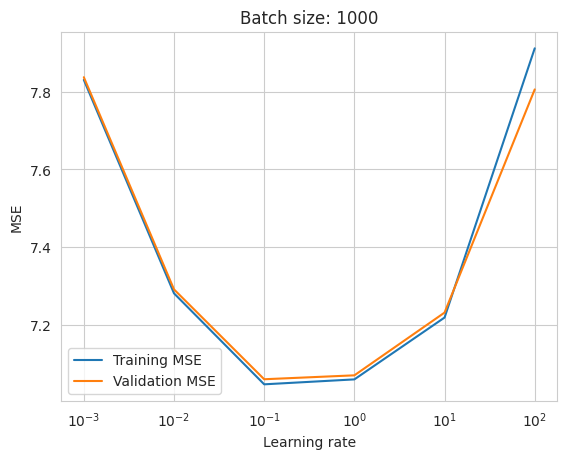

In [444]:
# Perform SGD with different batch sizes and learning rates

from sklearn.linear_model import SGDRegressor

batch_sizes = [1, 10, 100, 1000]

learning_rates = [0.001, 0.01, 0.1, 1, 10, 100]

for batch_size in batch_sizes:
    print("Batch size:", batch_size)
    mse_train_sgd = []
    mse_val_sgd = []
    for learning_rate in learning_rates:

        model_sgd = SGDRegressor(learning_rate="constant", eta0=learning_rate, max_iter=1000, tol=1e-3, random_state=42)

        mse_train_kf_sgd = []
        mse_val_kf_sgd = []
        for train_index, val_index in kf.split(X_train):

            X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

            model_sgd.fit(X_train_kf, y_train_kf, sample_weight=np.ones(len(y_train_kf)) / batch_size)

            y_train_pred_sgd = model_sgd.predict(X_train_kf)
            y_val_pred_sgd = model_sgd.predict(X_val_kf)

            mse_train_kf_sgd.append(mean_squared_error(y_train_kf, y_train_pred_sgd))
            mse_val_kf_sgd.append(mean_squared_error(y_val_kf, y_val_pred_sgd))

        mse_train_sgd.append(np.mean(mse_train_kf_sgd))
        mse_val_sgd.append(np.mean(mse_val_kf_sgd))

    # Plot the MSE as a function of learning rate
    plt.plot(learning_rates, mse_train_sgd, label="Training MSE")
    plt.plot(learning_rates, mse_val_sgd, label="Validation MSE")
    plt.xscale("log")
    plt.xlabel("Learning rate")
    plt.ylabel("MSE")
    plt.legend()
    plt.title("Batch size: " + str(batch_size))
    plt.show()

Batch size: 1


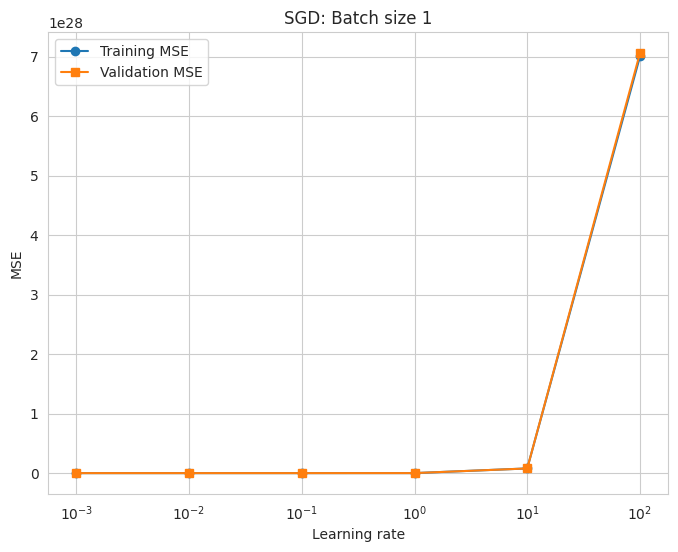

Batch size: 10


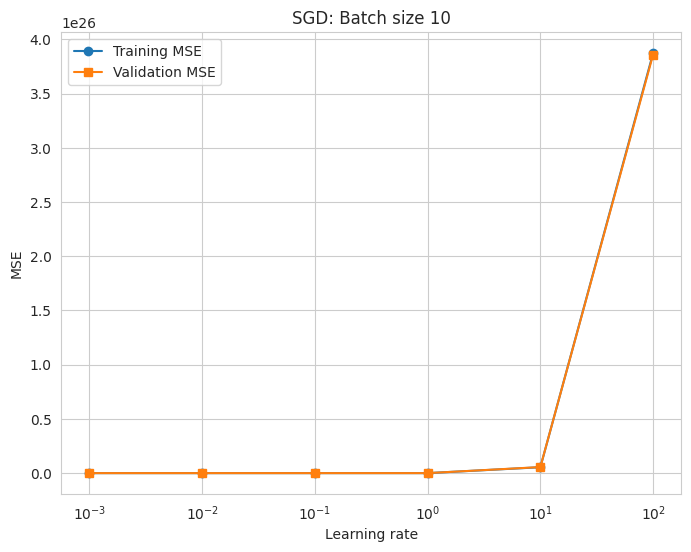

Batch size: 100


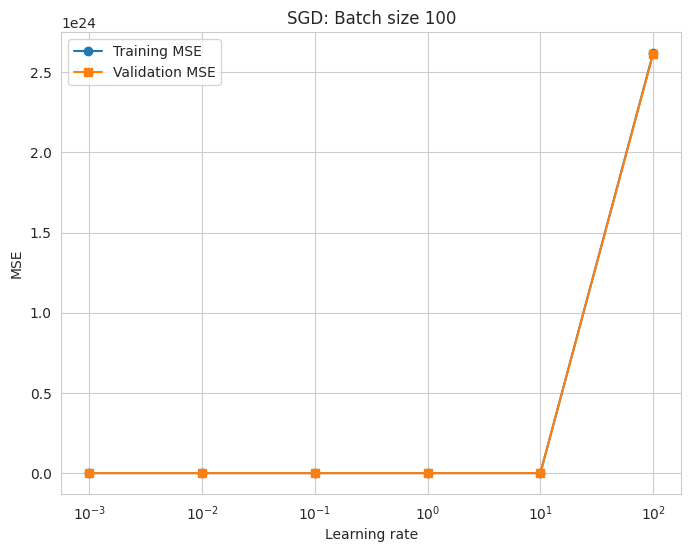

Batch size: 1000


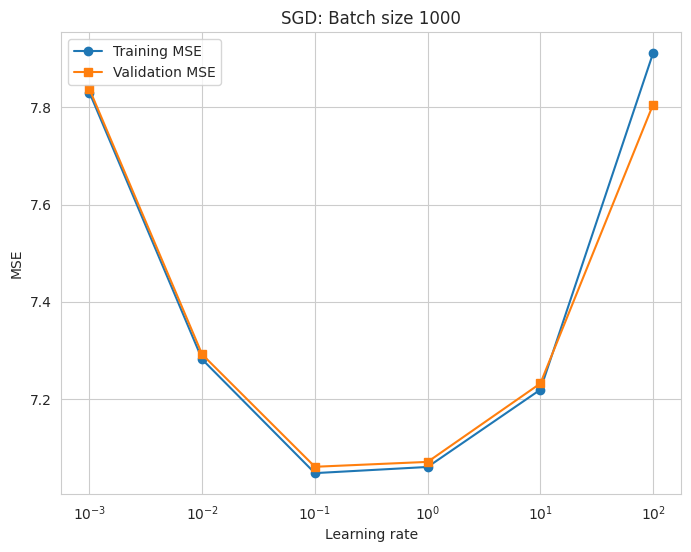

In [445]:
#Perform SGD with different batch sizes and learning rates

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

batch_sizes = [1, 10, 100, 1000]

learning_rates = [0.001, 0.01, 0.1, 1, 10, 100]

kf = KFold(n_splits=4, shuffle=True, random_state=42)

for batch_size in batch_sizes:
    print("Batch size:", batch_size)
    train = []
    val = []
    for learning_rate in learning_rates:
        model = SGDRegressor(learning_rate="constant", eta0=learning_rate, max_iter=1000, tol=1e-3, random_state=42)

        train_kf = []
        val_kf = []
        for train_index, val_index in kf.split(X_train):
            X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

            model.fit(X_train_kf, y_train_kf, sample_weight=np.ones(len(y_train_kf)) / batch_size)

            y_train_pred = model.predict(X_train_kf)
            y_val_pred = model.predict(X_val_kf)

            train_kf.append(mean_squared_error(y_train_kf, y_train_pred))
            val_kf.append(mean_squared_error(y_val_kf, y_val_pred))

        train.append(np.mean(train_kf))
        val.append(np.mean(val_kf))

    # Plot the MSE as a function of learning rate
    plt.figure(figsize=(8, 6))
    plt.plot(learning_rates, train, label="Training MSE", marker='o')
    plt.plot(learning_rates, val, label="Validation MSE", marker='s')
    plt.xscale("log")
    plt.xlabel("Learning rate")
    plt.ylabel("MSE")
    plt.legend()
    plt.title("SGD: Batch size " + str(batch_size))
    plt.show()


In [446]:
def regularizationmodels(model, reg_tech, n_iter, lr):
    if (model == 'sgd'):
        m=SGDRegressor(alpha=lr, penalty=reg_tech, max_iter=n_iter, tol=1e-3)

    kf = KFold(n_splits=4)
    scores = []
    for train_index, test_index in kf.split(X_train):
        train_loss_list=[]
        val_loss_list=[]
        for i in range(n_iter):

            if (model== 'normal_eqn'):
                m.fit(X_train, y_train)
            elif(model =='sgd'):
                m.partial_fit(X_train, y_train)

            #Calculate the training loss
            y_train_pred = m.predict(X_train)
            train_loss = mean_squared_error(y_train, y_train_pred)
            train_loss_list.append(train_loss)

            #Calculate the validation loss
            y_val_pred = m.predict(X_test)
            val_loss = mean_squared_error(y_test, y_val_pred)
            val_loss_list.append(val_loss)
        score = m.score(X_test, y_test)
        scores.append(score)
    plt.plot(range(n_iter), train_loss_list, label='Training Loss')
    plt.plot(range(n_iter), val_loss_list, label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print("Scores:", scores)
    print("Mean Score:", np.mean(scores))
    print("Score Std:", np.std(scores))


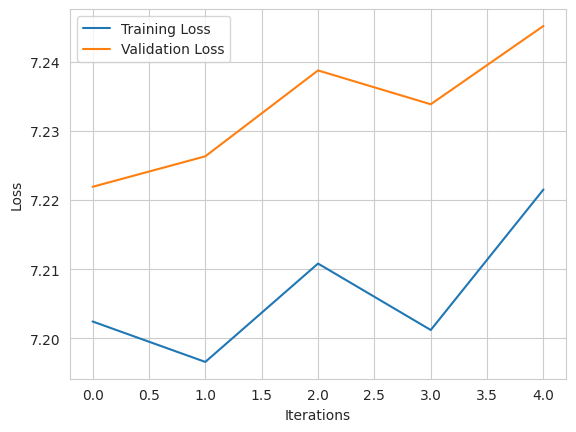

Scores: [0.35169266041449443, 0.33810386998539066, 0.33301105134077935, 0.33070932114124174]
Mean Score: 0.3383792257204765
Score Std: 0.008138920330088754


In [447]:
regularizationmodels('sgd', 'l1',5, 0.1)

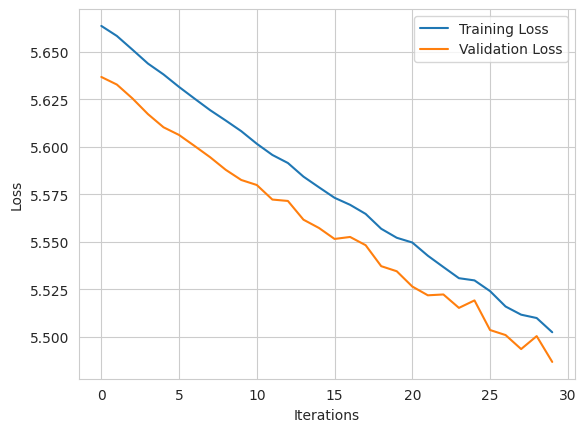

Scores: [0.42740438534937963, 0.4585434196252016, 0.4790617012178914, 0.493144476311279]
Mean Score: 0.46453849562593785
Score Std: 0.024718963944320417


In [448]:
regularizationmodels('sgd', 'l1',30, 0.001)

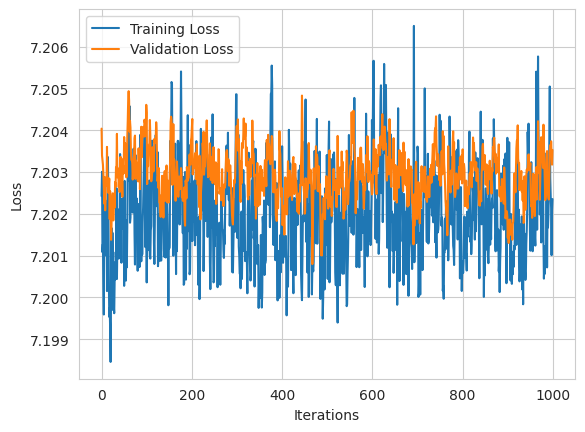

Scores: [0.33444131007391353, 0.33467068474995465, 0.33457612468418996, 0.3345599124242671]
Mean Score: 0.3345620079830813
Score Std: 8.152039246785106e-05


In [449]:
regularizationmodels('sgd', 'l1',1000, 0.1)

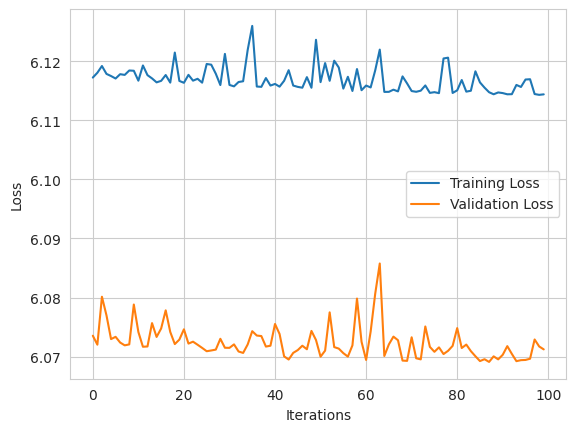

Scores: [0.4316284743443741, 0.43775570521460194, 0.4389855562074718, 0.43915888510653633]
Mean Score: 0.436882155218246
Score Std: 0.0030810731501512297


In [450]:
regularizationmodels('sgd', 'l2',100, 0.01)

hyperparameters significantly impact convergence of plots and performance. A smaller batch size can lead to faster but more volatile convergence, while a larger batch size tends toward more stable but slower convergence. The learning rate controls the step size at each iteration and can be chosen carefully to balance the speed of convergence with the risk of overshooting the minimum.

**POLYNOMIAL REGRESSION**

**F.Repeat everything from part E with polynomial regression. Using validation loss, explore if your model overfits/underfits the data.**

In [451]:
# Perform polynomial regression with cross-validation

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

degrees = [4, 3]

for degree in degrees:
    print("Degree:", degree)
    train = []
    val = []


    model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    for train_index, val_index in kf.split(X_train):

        model_poly.fit(X_train_kf, y_train_kf)

        y_train_pred = model_poly.predict(X_train_kf)
        y_val_pred = model_poly.predict(X_val_kf)

        train.append(mean_squared_error(y_train_kf, y_train_pred))
        val.append(mean_squared_error(y_val_kf, y_val_pred))


    print("Training MSE:", np.mean(train))
    print("Validation MSE:", np.mean(val))


Degree: 4
Training MSE: 3.429879681554859
Validation MSE: 171.8475129590063
Degree: 3
Training MSE: 3.3681259196970337
Validation MSE: 9.375948231358466


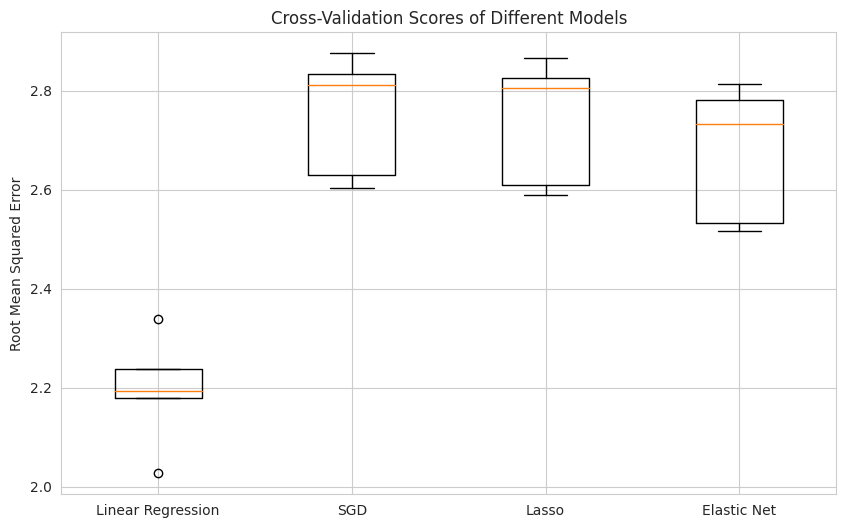

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "SGD": SGDRegressor(penalty="l1",max_iter=100,alpha=0.25),
    "Lasso": Lasso(max_iter=100,alpha=0.25),
    "Elastic Net": ElasticNet(alpha=0.1,max_iter=50)
}

scores = {}
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    scores[name] = np.sqrt(-score)

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(scores.values(), labels=scores.keys())
plt.ylabel("Root Mean Squared Error")
plt.title("Cross-Validation Scores of Different Models")
plt.show()

Upon reviewing the outcomes, it appears that our model underfits the data slightly.



**G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.**

Test RMSE: 2.220
Test R2: 0.545


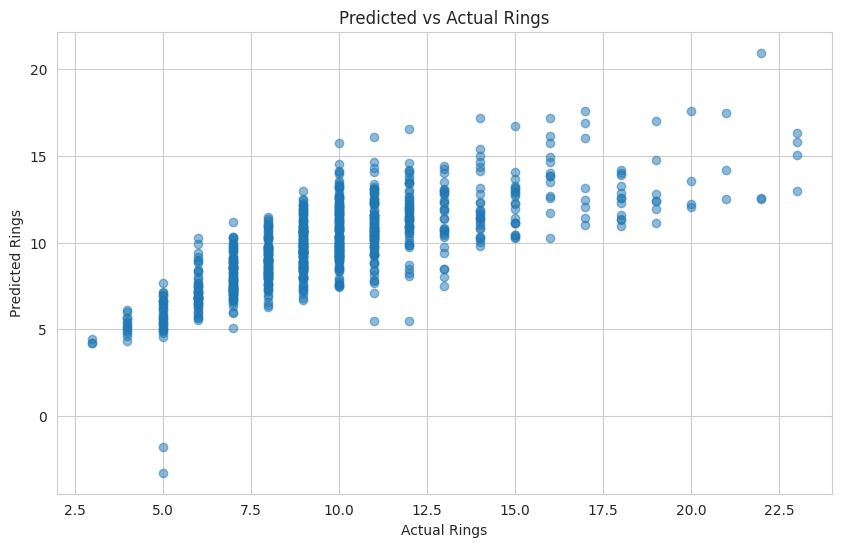

In [453]:
# Choose the best model based on the cross-validation scores
# In this case, Linear Regression has the lowest RMSE

best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the test performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R2: {r2:.3f}")

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Predicted vs Actual Rings")
plt.show()